In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import TieBreak, ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE

from large_gcs.algorithms.gcs_naive_astar import GcsAstarConvexRestriction
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)

import numpy as np

np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
# cg = ContactGraph.load_from_file(
#     ContactGraphGeneratorParams.graph_file_path_from_name("cg_trichal2")
# )

cg = IncrementalContactGraph.load_from_file(
    ContactGraphGeneratorParams.inc_graph_file_path_from_name("cg_maze_b1")
)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 10686.12it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 10824.01it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 50.13it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (151)
100%|██████████| 151/151 [00:00<00:00, 648.13it/s]


In [3]:
vertex_path = [
    "('NC|obs0_f1-obj0_v1', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
    "('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
    "('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')",
    "('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
    "('NC|obs0_v1-obj0_f0', 'NC|obs0_v1-rob0_f2', 'IC|obj0_f1-rob0_f1')",
    "('NC|obs0_v1-obj0_f0', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f1-rob0_f1')",
    "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f1-rob0_f1')",
    "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'NC|obj0_f1-rob0_f1')",
    "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'NC|obj0_f2-rob0_f2')",
    "('NC|obs0_v0-obj0_f1', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f2-rob0_f2')",
    "target",
]

INFO:large_gcs.algorithms.gcs_naive_astar:Running GcsAstarConvexRestriction, reexplore_level: ReexploreLevel.NONE
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 2}, n_vertices_visited: {0: 0}, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node source's 1 neighbors (0)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 3}, n_vertices_visited: {0: 1}, time_wall_clock: 0.0131, n_gcs_solves: 1, gcs_solve_time_total: 0.000848, gcs_solve_time_iter_mean: 0.000848, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: 0.000848, gcs_solve_time_iter_max: 0.000848, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f1-rob0_v0', 'NC|obj0_

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 102}, n_vertices_visited: {0: 3882}, time_wall_clock: 108, n_gcs_solves: 3882, gcs_solve_time_total: 8.01, gcs_solve_time_iter_mean: 0.00206, gcs_solve_time_last_10_mean: 0.00105, gcs_solve_time_iter_std: 0.00173, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.00944, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v0-obj0_f2', 'NC|obs0_f1-rob0_v0', 'NC|obj0_f1-rob0_f1')'s 63 neighbors (85.25881589681981)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 103}, n_vertices_visited: {0: 3915}, time_wall_clock: 109, n_gcs_solves: 3915, gcs_solve_time_total: 8.14, gcs_solve_time_iter_mean: 0.00208, gcs_solve_time_last_10_mean: 0.00396, gcs_solve_time_iter_std: 0.00173, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.00944, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 106}, n_vertices_visited: {0: 4199}, time_wall_clock: 124, n_gcs_solves: 4199, gcs_solve_time_total: 9, gcs_solve_time_iter_mean: 0.00214, gcs_solve_time_last_10_mean: 0.00124, gcs_solve_time_iter_std: 0.00175, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0102, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v0-obj0_f2', 'NC|obs0_f1-rob0_v0', 'NC|obj0_f2-rob0_f2')'s 109 neighbors (85.25881987980456)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 107}, n_vertices_visited: {0: 4259}, time_wall_clock: 126, n_gcs_solves: 4259, gcs_solve_time_total: 9.26, gcs_solve_time_iter_mean: 0.00217, gcs_solve_time_last_10_mean: 0.0042, gcs_solve_time_iter_std: 0.00176, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0102, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0'

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 239}, n_vertices_visited: {0: 7618}, time_wall_clock: 247, n_gcs_solves: 7618, gcs_solve_time_total: 25.8, gcs_solve_time_iter_mean: 0.00339, gcs_solve_time_last_10_mean: 0.00501, gcs_solve_time_iter_std: 0.00235, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f1-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')'s 94 neighbors (69.6995730851896)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 240}, n_vertices_visited: {0: 7671}, time_wall_clock: 249, n_gcs_solves: 7671, gcs_solve_time_total: 26.1, gcs_solve_time_iter_mean: 0.0034, gcs_solve_time_last_10_mean: 0.00309, gcs_solve_time_iter_std: 0.00234, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f1-obj0_v1', 'NC|obs0_v0-rob0_f0

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 245}, n_vertices_visited: {0: 7903}, time_wall_clock: 266, n_gcs_solves: 7903, gcs_solve_time_total: 27.1, gcs_solve_time_iter_mean: 0.00342, gcs_solve_time_last_10_mean: 0.00262, gcs_solve_time_iter_std: 0.00234, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f1-obj0_v1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')'s 33 neighbors (71.2995691582849)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 246}, n_vertices_visited: {0: 7919}, time_wall_clock: 267, n_gcs_solves: 7919, gcs_solve_time_total: 27.1, gcs_solve_time_iter_mean: 0.00343, gcs_solve_time_last_10_mean: 0.0048, gcs_solve_time_iter_std: 0.00234, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f1-obj0_v1', 'NC|obs0_f1-rob0_v0

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 253}, n_vertices_visited: {0: 8172}, time_wall_clock: 285, n_gcs_solves: 8172, gcs_solve_time_total: 28.2, gcs_solve_time_iter_mean: 0.00346, gcs_solve_time_last_10_mean: 0.00651, gcs_solve_time_iter_std: 0.00234, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f1-obj0_v1', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f1-rob0_f1')'s 49 neighbors (72.66867626356004)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 254}, n_vertices_visited: {0: 8203}, time_wall_clock: 286, n_gcs_solves: 8203, gcs_solve_time_total: 28.4, gcs_solve_time_iter_mean: 0.00346, gcs_solve_time_last_10_mean: 0.00272, gcs_solve_time_iter_std: 0.00234, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_f1-obj0_v1', 'NC|obs0_f1-rob0_

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 361}, n_vertices_visited: {0: 9786}, time_wall_clock: 365, n_gcs_solves: 9786, gcs_solve_time_total: 34.4, gcs_solve_time_iter_mean: 0.00352, gcs_solve_time_last_10_mean: 0.00214, gcs_solve_time_iter_std: 0.00231, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')'s 67 neighbors (202.46993490176968)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 362}, n_vertices_visited: {0: 9798}, time_wall_clock: 366, n_gcs_solves: 9798, gcs_solve_time_total: 34.5, gcs_solve_time_iter_mean: 0.00352, gcs_solve_time_last_10_mean: 0.00623, gcs_solve_time_iter_std: 0.00231, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_f1-rob0

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 365}, n_vertices_visited: {0: 9939}, time_wall_clock: 382, n_gcs_solves: 9939, gcs_solve_time_total: 34.9, gcs_solve_time_iter_mean: 0.00351, gcs_solve_time_last_10_mean: 0.00185, gcs_solve_time_iter_std: 0.0023, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')'s 23 neighbors (203.53995667715486)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 366}, n_vertices_visited: {0: 9945}, time_wall_clock: 382, n_gcs_solves: 9945, gcs_solve_time_total: 34.9, gcs_solve_time_iter_mean: 0.00351, gcs_solve_time_last_10_mean: 0.00407, gcs_solve_time_iter_std: 0.0023, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_f1-rob0_v

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 385}, n_vertices_visited: {0: 10630}, time_wall_clock: 418, n_gcs_solves: 10630, gcs_solve_time_total: 36.8, gcs_solve_time_iter_mean: 0.00346, gcs_solve_time_last_10_mean: 0.00151, gcs_solve_time_iter_std: 0.00229, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')'s 124 neighbors (208.7528635353366)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp13i7kh7s/temp.m4v


INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 386}, n_vertices_visited: {0: 10689}, time_wall_clock: 433, n_gcs_solves: 10689, gcs_solve_time_total: 37, gcs_solve_time_iter_mean: 0.00346, gcs_solve_time_last_10_mean: 0.00154, gcs_solve_time_iter_std: 0.00229, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'NC|obj0_v0-rob0_f0')'s 105 neighbors (208.7528637889036)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 387}, n_vertices_visited: {0: 10741}, time_wall_clock: 435, n_gcs_solves: 10741, gcs_solve_time_total: 37.1, gcs_solve_time_iter_mean: 0.00346, gcs_solve_time_last_10_mean: 0.00147, gcs_solve_time_iter_std: 0.00229, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('NC|obs0_v1-obj0_f0', 'NC|obs0_v0-ro

INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 489}, n_vertices_visited: {0: 12310}, time_wall_clock: 519, n_gcs_solves: 12310, gcs_solve_time_total: 42.3, gcs_solve_time_iter_mean: 0.00344, gcs_solve_time_last_10_mean: 0.00567, gcs_solve_time_iter_std: 0.00225, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('IC|obs0_v1-obj0_f0', 'NC|obs0_f1-rob0_v0', 'IC|obj0_f1-rob0_f1')'s 11 neighbors (436.7636754698069)
INFO:large_gcs.algorithms.gcs_naive_astar:
n_vertices_expanded: {0: 490}, n_vertices_visited: {0: 12312}, time_wall_clock: 519, n_gcs_solves: 12312, gcs_solve_time_total: 42.3, gcs_solve_time_iter_mean: 0.00344, gcs_solve_time_last_10_mean: 0.00579, gcs_solve_time_iter_std: 0.00225, gcs_solve_time_iter_min: 0.000144, gcs_solve_time_iter_max: 0.0335, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}
now exploring node ('IC|obs0_v1-obj0_f0', 'NC|obs0_v1-r

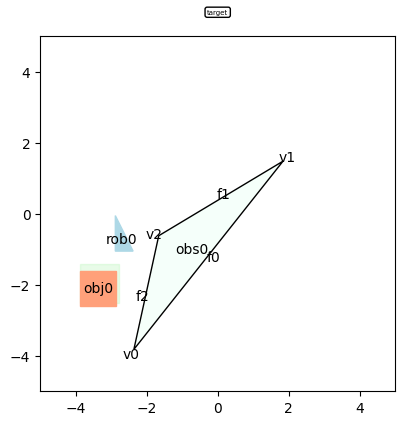

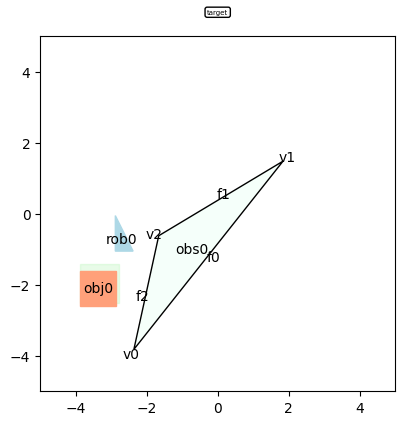

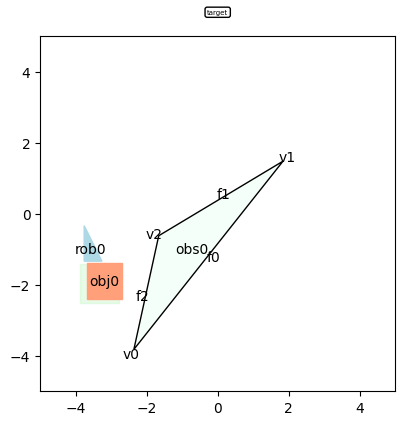

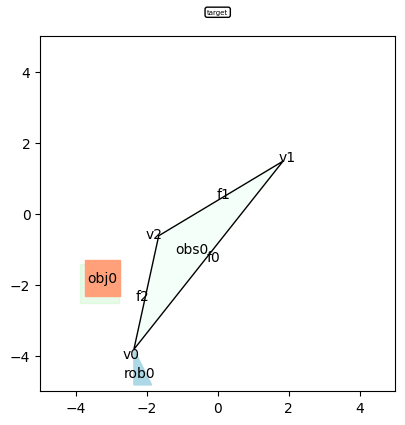

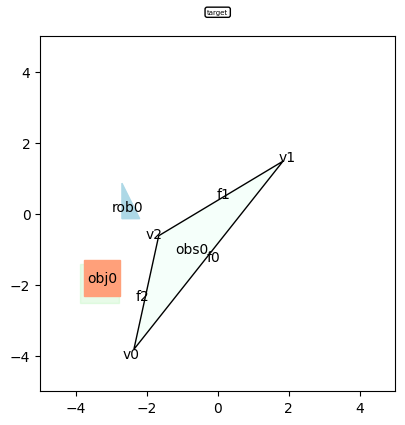

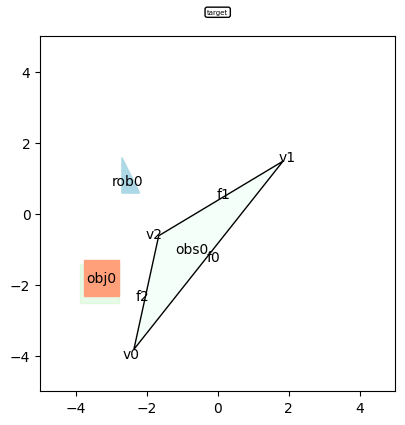

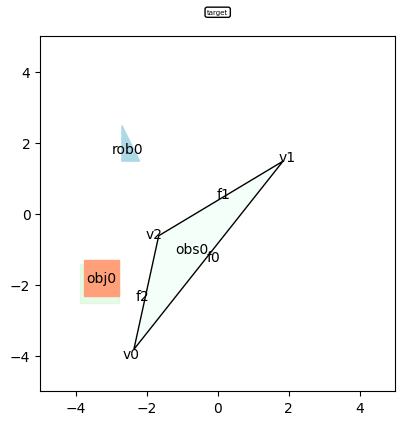

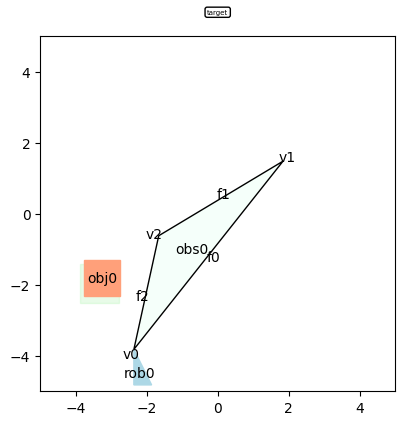

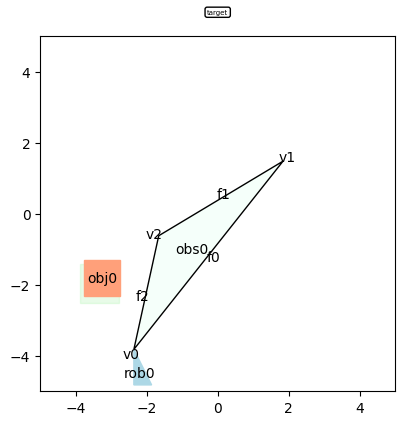

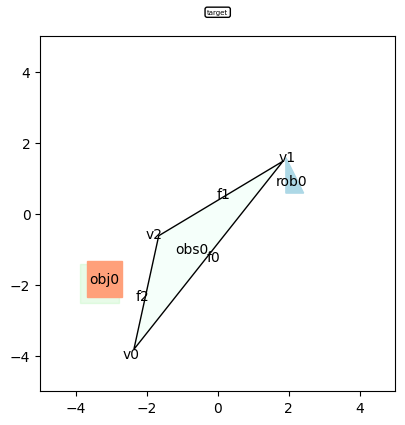

In [4]:
cost_estimator_se = ShortcutEdgeCE(
    cg, contact_shortcut_edge_cost_factory_over_obj_weighted
)
gcs_astar_se = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.NONE,
)
sol_se = gcs_astar_se.run(
    animate_intermediate=True, animate_intermediate_sets=vertex_path
)